## Importing Dependencies

In [1]:
from nba_api.stats.endpoints import commonallplayers, leagueseasonmatchups, commonteamroster

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pickle as pk

## Mining data

In [3]:
all_players = commonallplayers.CommonAllPlayers(season='2021-22').get_data_frames()[0]

In [4]:
all_players.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,PLAYER_SLUG,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_SLUG,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,alaa_abdelnaby,0,,,,,None,Y,00
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,zaid_abdul-aziz,0,,,,,None,Y,00
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,kareem_abdul-jabbar,0,,,,,None,Y,00
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,mahmoud_abdul-rauf,0,,,,,None,Y,00
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,tariq_abdul-wahad,0,,,,,None,Y,00


In [5]:
# Get all the players in the NBA for the 2021-2022 season
all_players = commonallplayers.CommonAllPlayers(season='2021-22').get_data_frames()[0]
# Filter all the players down to the ones that played in the 2021-2022 season
players = all_players[(all_players['TO_YEAR'] >= '2021') & (all_players['FROM_YEAR'] <= '2021')]
players = players[['PERSON_ID', 'DISPLAY_FIRST_LAST', 'PLAYER_SLUG', 'TEAM_ABBREVIATION', 'TEAM_ID']]
players


,PERSON_ID,DISPLAY_FIRST_LAST,PLAYER_SLUG,TEAM_ABBREVIATION,TEAM_ID
10,1630173,Precious Achiuwa,precious_achiuwa,TOR,1610612761
22,203500,Steven Adams,steven_adams,MEM,1610612763
24,1628389,Bam Adebayo,bam_adebayo,MIA,1610612748
41,1630583,Santi Aldama,santi_aldama,MEM,1610612763
44,200746,LaMarcus Aldridge,lamarcus_aldridge,BKN,1610612751
...,...,...,...,...,...
4796,201152,Thaddeus Young,thaddeus_young,TOR,1610612761
4798,1629027,Trae Young,trae_young,ATL,1610612737
4799,1630209,Omer Yurtseven,omer_yurtseven,MIA,1610612748
4802,203469,Cody Zeller,cody_zeller,,0


In [6]:
# Save and load dataframes to and from pickle files

def checkpoint(filename, data):
    # Save data to a pickle file
    filename = "datasets/" + filename
    with open(filename, 'wb') as f:
        pk.dump(data, f)

def load_checkpoint(filename):
    # Load data from a pickle file
    filename = "datasets/" + filename
    with open(filename, 'rb') as f:
        return pk.load(f)

In [29]:
checkpoint('players.pkl', players)

In [4]:
players = load_checkpoint('players.pkl')
players.head()

,PERSON_ID,DISPLAY_FIRST_LAST,PLAYER_SLUG,TEAM_ABBREVIATION
10,1630173,Precious Achiuwa,precious_achiuwa,TOR
22,203500,Steven Adams,steven_adams,MEM
24,1628389,Bam Adebayo,bam_adebayo,MIA
41,1630583,Santi Aldama,santi_aldama,MEM
44,200746,LaMarcus Aldridge,lamarcus_aldridge,BKN


In [349]:
matchups = leagueseasonmatchups.LeagueSeasonMatchups(season='2021-22').get_data_frames()[0]
matchups.head()

,SEASON_ID,OFF_PLAYER_ID,OFF_PLAYER_NAME,DEF_PLAYER_ID,DEF_PLAYER_NAME,GP,MATCHUP_MIN,PARTIAL_POSS,PLAYER_PTS,TEAM_PTS,...,MATCHUP_FG3A,MATCHUP_FG3_PCT,HELP_BLK,HELP_FGM,HELP_FGA,HELP_FG_PERC,MATCHUP_FTM,MATCHUP_FTA,SFL,MATCHUP_TIME_SEC
0,22021,203991,Clint Capela,202696,Nikola Vucevic,4,36:41,188.9,28,208,...,0,0.000,0,0,0,0,0,0,0,2201.4
1,22021,1627734,Domantas Sabonis,202696,Nikola Vucevic,4,37:10,184.4,52,210,...,3,0.333,0,0,0,0,7,8,4,2230.4
2,22021,201935,James Harden,1630171,Isaac Okoro,6,36:52,183.5,22,175,...,7,0.286,0,0,0,0,6,9,3,2212.0
3,22021,203999,Nikola Jokic,203500,Steven Adams,4,34:26,170.0,65,196,...,14,0.357,0,0,0,0,4,5,2,2065.6
4,22021,1628976,Wendell Carter Jr.,202696,Nikola Vucevic,4,35:60,165.2,58,164,...,11,0.364,0,0,0,0,6,9,5,2159.7


In [350]:
# Shrink the dataframe to only the columns we need
matchups = matchups[[
    'OFF_PLAYER_ID',
    'DEF_PLAYER_ID',
    'GP',
    'MATCHUP_MIN',
    'PLAYER_PTS',
    'TEAM_PTS',
    'MATCHUP_AST',
    'MATCHUP_TOV',
    'MATCHUP_BLK',
    'MATCHUP_FGM',
    'MATCHUP_FGA',
    'MATCHUP_FG_PCT',
    'MATCHUP_FG3M',
    'MATCHUP_FG3A',
    'MATCHUP_FG3_PCT',
    'MATCHUP_TIME_SEC',
    'SFL'
]]

matchups.head()

,OFF_PLAYER_ID,DEF_PLAYER_ID,GP,MATCHUP_MIN,PLAYER_PTS,TEAM_PTS,MATCHUP_AST,MATCHUP_TOV,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_TIME_SEC,SFL
0,203991,202696,4,36:41,28,208,7,0,2,14,28,0.500,0,0,0.000,2201.4,0
1,1627734,202696,4,37:10,52,210,20,8,2,22,42,0.524,1,3,0.333,2230.4,4
2,201935,1630171,6,36:52,22,175,21,8,0,7,19,0.368,2,7,0.286,2212.0,3
3,203999,203500,4,34:26,65,196,19,3,0,28,46,0.609,5,14,0.357,2065.6,2
4,1628976,202696,4,35:60,58,164,8,7,1,24,38,0.632,4,11,0.364,2159.7,5


In [312]:
matchups['MATCHUP_TIME_SEC'].describe()

count    142456.000000
mean         98.434529
std         140.478156
min           0.100000
25%          19.600000
50%          50.000000
75%         117.400000
max        2230.400000
Name: MATCHUP_TIME_SEC, dtype: float64

In [318]:
players[players['PERSON_ID'] == 1630171]

,PERSON_ID,DISPLAY_FIRST_LAST,PLAYER_SLUG,TEAM_ABBREVIATION,TEAM_ID
3225,1630171,Isaac Okoro,isaac_okoro,CLE,1610612739


In [348]:
# Get matchups longer than 60 seconds
matchups[matchups['MATCHUP_TIME_SEC'] > 60]

,OFF_PLAYER_ID,DEF_PLAYER_ID,GP,MATCHUP_MIN,PLAYER_PTS,TEAM_PTS,MATCHUP_AST,MATCHUP_TOV,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_TIME_SEC
0,203991,202696,4,36:41,28,208,7,0,2,14,28,0.500,0,0,0.000,2201.4
1,1627734,202696,4,37:10,52,210,20,8,2,22,42,0.524,1,3,0.333,2230.4
2,201935,1630171,6,36:52,22,175,21,8,0,7,19,0.368,2,7,0.286,2212.0
3,203999,203500,4,34:26,65,196,19,3,0,28,46,0.609,5,14,0.357,2065.6
4,1628976,202696,4,35:60,58,164,8,7,1,24,38,0.632,4,11,0.364,2159.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92461,203110,1629103,1,1:01,0,1,0,1,0,0,0,0.000,0,0,0.000,61.0
92613,1628425,203115,1,1:01,0,2,0,0,0,0,0,0.000,0,0,0.000,61.2
94777,1628386,1629060,1,1:01,4,4,0,0,0,1,1,1.000,0,0,0.000,60.6
98880,1629718,1630230,1,1:09,0,3,0,0,0,0,0,0.000,0,0,0.000,68.8


In [37]:
checkpoint('matchups.pkl', matchups)

In [589]:
matchups = load_checkpoint('matchups.pkl')
matchups.head()

,OFF_PLAYER_ID,DEF_PLAYER_ID,GP,MATCHUP_MIN,PLAYER_PTS,TEAM_PTS,MATCHUP_AST,MATCHUP_TOV,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_TIME_SEC
0,203991,202696,4,36:41,28,208,7,0,2,14,28,0.500,0,0,0.000,2201.4
1,1627734,202696,4,37:10,52,210,20,8,2,22,42,0.524,1,3,0.333,2230.4
2,201935,1630171,6,36:52,22,175,21,8,0,7,19,0.368,2,7,0.286,2212.0
3,203999,203500,4,34:26,65,196,19,3,0,28,46,0.609,5,14,0.357,2065.6
4,1628976,202696,4,35:60,58,164,8,7,1,24,38,0.632,4,11,0.364,2159.7


In [591]:
matchups.head()

,OFF_PLAYER_ID,DEF_PLAYER_ID,GP,MATCHUP_MIN,PLAYER_PTS,TEAM_PTS,MATCHUP_AST,MATCHUP_TOV,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_TIME_SEC
0,203991,202696,4,36:41,28,208,7,0,2,14,28,0.500,0,0,0.000,2201.4
1,1627734,202696,4,37:10,52,210,20,8,2,22,42,0.524,1,3,0.333,2230.4
2,201935,1630171,6,36:52,22,175,21,8,0,7,19,0.368,2,7,0.286,2212.0
3,203999,203500,4,34:26,65,196,19,3,0,28,46,0.609,5,14,0.357,2065.6
4,1628976,202696,4,35:60,58,164,8,7,1,24,38,0.632,4,11,0.364,2159.7


In [590]:
matchups['MATCHUP_TIME_SEC'].describe()

count    142456.000000
mean         98.434529
std         140.478156
min           0.100000
25%          19.600000
50%          50.000000
75%         117.400000
max        2230.400000
Name: MATCHUP_TIME_SEC, dtype: float64

## Creating a network with basic edges (matchups)

In [6]:
players.head()

,PERSON_ID,DISPLAY_FIRST_LAST,PLAYER_SLUG,TEAM_ABBREVIATION
10,1630173,Precious Achiuwa,precious_achiuwa,TOR
22,203500,Steven Adams,steven_adams,MEM
24,1628389,Bam Adebayo,bam_adebayo,MIA
41,1630583,Santi Aldama,santi_aldama,MEM
44,200746,LaMarcus Aldridge,lamarcus_aldridge,BKN


In [21]:
basic_edges = matchups[['OFF_PLAYER_ID', 'DEF_PLAYER_ID']].join(players.set_index('PERSON_ID'), on='OFF_PLAYER_ID').join(players.set_index('PERSON_ID'), on='DEF_PLAYER_ID', rsuffix='_def')[['DISPLAY_FIRST_LAST', 'DISPLAY_FIRST_LAST_def']]
basic_edges.head()

,DISPLAY_FIRST_LAST,DISPLAY_FIRST_LAST_def
0,Clint Capela,Nikola Vucevic
1,Domantas Sabonis,Nikola Vucevic
2,James Harden,Isaac Okoro
3,Nikola Jokic,Steven Adams
4,Wendell Carter Jr.,Nikola Vucevic


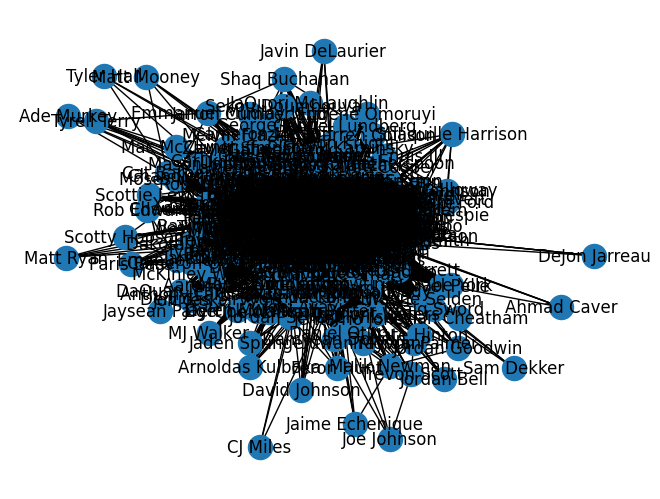

In [22]:
basic_network = nx.from_pandas_edgelist(basic_edges, 'DISPLAY_FIRST_LAST', 'DISPLAY_FIRST_LAST_def')
nx.draw(basic_network, with_labels=True)

In [37]:
basic_network['Luka Doncic']

AtlasView({'Aaron Gordon': {}, 'Dejounte Murray': {}, 'Andrew Wiggins': {}, 'Garrett Temple': {}, 'Luguentz Dort': {}, 'Herbert Jones': {}, "De'Andre Hunter": {}, "Royce O'Neale": {}, 'Keldon Johnson': {}, 'P.J. Tucker': {}, 'Matisse Thybulle': {}, 'Aaron Wiggins': {}, 'Ivica Zubac': {}, 'RJ Barrett': {}, 'Devin Vassell': {}, 'Bruce Brown': {}, 'Terance Mann': {}, 'Lonzo Ball': {}, 'Franz Wagner': {}, 'Marcus Morris Sr.': {}, 'Isaac Okoro': {}, 'Ziaire Williams': {}, 'Scottie Barnes': {}, 'Jarred Vanderbilt': {}, 'Jimmy Butler': {}, 'Kentavious Caldwell-Pope': {}, 'Chuma Okeke': {}, 'Malcolm Brogdon': {}, 'Alec Burks': {}, 'Desmond Bane': {}, 'Gary Payton II': {}, 'Marcus Smart': {}, 'Tony Snell': {}, 'Derrick White': {}, 'Amir Coffey': {}, 'Jrue Holiday': {}, 'Dillon Brooks': {}, 'Lauri Markkanen': {}, 'Killian Tillie': {}, 'Jaren Jackson Jr.': {}, 'Jeff Green': {}, 'Kevon Looney': {}, 'Mo Bamba': {}, 'Mikal Bridges': {}, 'Russell Westbrook': {}, 'Danny Green': {}, 'O.G. Anunoby': {},

In [46]:
nx.write_gexf(basic_network, 'basic_network.gexf')

## Determining matchup winner

In [89]:
matchups = load_checkpoint('matchups.pkl')
matchups.head()

,OFF_PLAYER_ID,DEF_PLAYER_ID,GP,MATCHUP_MIN,PLAYER_PTS,TEAM_PTS,MATCHUP_AST,MATCHUP_TOV,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_TIME_SEC
0,203991,202696,4,36:41,28,208,7,0,2,14,28,0.500,0,0,0.000,2201.4
1,1627734,202696,4,37:10,52,210,20,8,2,22,42,0.524,1,3,0.333,2230.4
2,201935,1630171,6,36:52,22,175,21,8,0,7,19,0.368,2,7,0.286,2212.0
3,203999,203500,4,34:26,65,196,19,3,0,28,46,0.609,5,14,0.357,2065.6
4,1628976,202696,4,35:60,58,164,8,7,1,24,38,0.632,4,11,0.364,2159.7


In [393]:
matchups[matchups['OFF_PLAYER_ID'] == 201939].sort_values('MATCHUP_TIME_SEC', ascending=False)

,OFF_PLAYER_ID,DEF_PLAYER_ID,GP,MATCHUP_MIN,PLAYER_PTS,TEAM_PTS,MATCHUP_AST,MATCHUP_TOV,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_TIME_SEC,SFL
28,201939,1629652,3,26:21,31,156,9,4,0,10,17,0.588,7,13,0.538,1581.1,2
108,201939,203493,4,20:29,22,107,14,2,2,8,27,0.296,3,10,0.300,1228.6,2
150,201939,1629611,4,19:13,16,80,3,4,0,6,15,0.400,4,9,0.444,1153.2,0
190,201939,203085,3,18:25,17,99,5,2,0,6,16,0.375,1,8,0.125,1104.7,2
321,201939,1628969,3,17:20,4,57,5,0,0,2,12,0.167,0,5,0.000,1039.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137726,201939,1630625,1,0:04,0,3,0,0,0,0,0,0.000,0,0,0.000,4.1,0
133302,201939,203476,1,0:03,2,2,0,0,0,1,1,1.000,0,0,0.000,3.1,0
140785,201939,1626195,1,0:02,0,0,0,0,0,0,0,0.000,0,0,0.000,1.7,0
138381,201939,203648,1,0:02,0,0,0,0,0,0,0,0.000,0,0,0.000,1.6,0


In [397]:
players[players['PERSON_ID'] == 1629652]

,PERSON_ID,DISPLAY_FIRST_LAST,PLAYER_SLUG,TEAM_ABBREVIATION,TEAM_ID
1094,1629652,Luguentz Dort,luguentz_dort,OKC,1610612760


In [475]:
matchups = load_checkpoint('matchups_2021-22.pkl')
matchups.head()

,OFF_PLAYER_ID,DEF_PLAYER_ID,GP,MATCHUP_MIN,PLAYER_PTS,TEAM_PTS,MATCHUP_AST,MATCHUP_TOV,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_TIME_SEC,SFL
0,203991,202696,4,36:41,28,208,7,0,2,14,28,0.500,0,0,0.000,2201.4,0
1,1627734,202696,4,37:10,52,210,20,8,2,22,42,0.524,1,3,0.333,2230.4,4
2,201935,1630171,6,36:52,22,175,21,8,0,7,19,0.368,2,7,0.286,2212.0,3
3,203999,203500,4,34:26,65,196,19,3,0,28,46,0.609,5,14,0.357,2065.6,2
4,1628976,202696,4,35:60,58,164,8,7,1,24,38,0.632,4,11,0.364,2159.7,5


In [482]:
# Let's take two players to try an determing a matchup winner
player1 = players[players['DISPLAY_FIRST_LAST'] == 'Devin Booker']['PERSON_ID'].values[0]
player2 = players[players['DISPLAY_FIRST_LAST'] == 'Saddiq Bey']['PERSON_ID'].values[0]

print(player1, player2)
# Get the matchups between the two players
player1_matchups = matchups[(matchups['OFF_PLAYER_ID'] == player1) & (matchups['DEF_PLAYER_ID'] == player2)]
player2_matchups = matchups[(matchups['OFF_PLAYER_ID'] == player2) & (matchups['DEF_PLAYER_ID'] == player1)]

player1_matchups.head()

1626164 1630180


,OFF_PLAYER_ID,DEF_PLAYER_ID,GP,MATCHUP_MIN,PLAYER_PTS,TEAM_PTS,MATCHUP_AST,MATCHUP_TOV,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_TIME_SEC,SFL
54320,1626164,1630180,1,1:17,2,7,1,0,0,1,2,0.5,0,1,0.0,77.5,0


In [483]:
player2_matchups.head()

,OFF_PLAYER_ID,DEF_PLAYER_ID,GP,MATCHUP_MIN,PLAYER_PTS,TEAM_PTS,MATCHUP_AST,MATCHUP_TOV,MATCHUP_BLK,MATCHUP_FGM,MATCHUP_FGA,MATCHUP_FG_PCT,MATCHUP_FG3M,MATCHUP_FG3A,MATCHUP_FG3_PCT,MATCHUP_TIME_SEC,SFL
49650,1630180,1626164,1,1:08,3,5,0,0,0,1,1,1.0,1,1,1.0,67.8,0


In [484]:
stats = [
        'MATCHUP_AST',
        'MATCHUP_BLK',
        'MATCHUP_TOV',
        'MATCHUP_FGM',
        'MATCHUP_FG3M',
        'SFL'
    ]
player1_matchups[stats].head()

,MATCHUP_AST,MATCHUP_BLK,MATCHUP_TOV,MATCHUP_FGM,MATCHUP_FG3M,SFL
54320,1,0,0,1,0,0


In [485]:
player2_matchups[stats].head()

,MATCHUP_AST,MATCHUP_BLK,MATCHUP_TOV,MATCHUP_FGM,MATCHUP_FG3M,SFL
49650,0,0,0,1,1,0


In [480]:
def determine_matchup_winner(matchup1, matchup2):
    player_1 = matchup1['OFF_PLAYER_ID'].values[0]
    player_2 = matchup2['OFF_PLAYER_ID'].values[0]

    score = 0

    # Determine the winner of the matchup based on the following criteria
    # 1. Points -- Offensive player with the most points wins
    # 2. Assists -- Offensive player with the most assists wins
    # 3. Blocks -- Defensive player with the most blocks wins
    # 4. Turnovers -- Offensive player with the least turnovers wins
    # All stats are normalized by the number of seconds played in the matchup

    criteria = [
        'MATCHUP_AST',
        'MATCHUP_BLK',
        'MATCHUP_TOV',
        'MATCHUP_FGM',
        'MATCHUP_FG3M',
        'SFL'
    ]

    for c in criteria:
        switch = 1
        if c in ['MATCHUP_TOV', 'MATCHUP_BLK']:
            switch = -1

        player_1_stats = matchup1[c].values[0] / matchup1['MATCHUP_TIME_SEC'].values[0]
        player_2_stats = matchup2[c].values[0] / matchup2['MATCHUP_TIME_SEC'].values[0]

        total_stats = player_1_stats + player_2_stats

        # print(c, player_1_stats, player_2_stats)
        if total_stats == 0:
            continue

        differential = (switch * player_1_stats - switch * player_2_stats)
        # differential /= total_stats
        score += differential
        print(differential, score)
    
    # Determine the winner of the matchup
    if score > 0:
        winner = player_1
    elif score < 0:
        winner = player_2
    else:
        winner = None

    total_matchup_time = matchup1['MATCHUP_TIME_SEC'].values[0] + matchup2['MATCHUP_TIME_SEC'].values[0]
    return winner, score, total_matchup_time

determine_matchup_winner(player1_matchups, player2_matchups)

0.0017318217803196606 0.0017318217803196606
-0.0010199918400652795 0.0007118299402543811
0.0027518136203849406 0.0034636435606393216


(201142, 0.0034636435606393216, 1574.1999999999998)

In [213]:
def player_id_to_name(player_id):
    return players[players['PERSON_ID'] == player_id]['DISPLAY_FIRST_LAST'].values[0]

In [214]:
# Remove matchups that are less than 1 second long
matchups = matchups[matchups['MATCHUP_TIME_SEC'] > 1]

In [ ]:
## Calculate the matchup winner for each matchup
matchup_winners = pd.DataFrame(columns=['Source', 'Target', 'Score ratio', 'Matchup time (sec)'])

for index, row in matchups.iterrows():
    print(index)
    player_1 = row['OFF_PLAYER_ID']
    player_2 = row['DEF_PLAYER_ID']
    player_1_name = player_id_to_name(player_1)
    player_2_name = player_id_to_name(player_2)

    if len(list(filter(lambda x: set([x[0], x[1]]) == set([player_1_name, player_2_name]), matchup_winners.values))):
        continue
    
    matchup_1 = matchups[(matchups['OFF_PLAYER_ID'] == player_1) & (matchups['DEF_PLAYER_ID'] == player_2)]
    matchup_2 = matchups[(matchups['OFF_PLAYER_ID'] == player_2) & (matchups['DEF_PLAYER_ID'] == player_1)]

    if matchup_2.empty:
        continue

    winner, score, matchup_time = determine_matchup_winner(matchup_1, matchup_2)

    if winner is None:
        continue

    loser = player_1 if winner == player_2 else player_2
    edge_weight = np.abs(score)

    matchup_winners.loc[len(matchup_winners)] = [player_id_to_name(loser), player_id_to_name(winner), edge_weight, matchup_time]

matchup_winners.head()

In [218]:
len(matchups)

142328

In [219]:
len(matchup_winners)

53079

In [220]:
matchup_winners.head()

,Source,Target,Score ratio,Matchup time (sec)
0,Clint Capela,Nikola Vucevic,0.007662,4040.4
1,Nikola Vucevic,Domantas Sabonis,0.010191,3776.8
2,Isaac Okoro,James Harden,0.010149,3621.9
3,Steven Adams,Nikola Jokic,0.027087,4127.1
4,Nikola Vucevic,Wendell Carter Jr.,0.004320,3651.5


In [221]:
# Normalize matchup time per target
matchup_winners['Matchup time normalized'] = matchup_winners.groupby('Target')['Matchup time (sec)'].transform(lambda x: x / x.max())
# matchup_winners['Matchup time normalized'] = matchup_winners['Matchup time (sec)'] / matchup_winners['Matchup time (sec)'].max()
# Calculate the edge weight as the product of the score ratio and the normalized matchup time
matchup_winners['Edge weight'] = matchup_winners['Score ratio'] * matchup_winners['Matchup time normalized']

matchup_winners.head()

,Source,Target,Score ratio,Matchup time (sec),Matchup time normalized,Edge weight
0,Clint Capela,Nikola Vucevic,0.007662,4040.4,1.0,0.007662
1,Nikola Vucevic,Domantas Sabonis,0.010191,3776.8,1.0,0.010191
2,Isaac Okoro,James Harden,0.010149,3621.9,1.0,0.010149
3,Steven Adams,Nikola Jokic,0.027087,4127.1,1.0,0.027087
4,Nikola Vucevic,Wendell Carter Jr.,0.004320,3651.5,1.0,0.004320


In [222]:
checkpoint('matchup_winners.pkl', matchup_winners)

In [7]:
matchup_winners = load_checkpoint('matchup_winners.pkl')
matchup_winners.head()

,Source,Target,Score ratio,Matchup time (sec),Matchup time normalized,Edge weight
0,Clint Capela,Nikola Vucevic,0.007662,4040.4,1.0,0.007662
1,Nikola Vucevic,Domantas Sabonis,0.010191,3776.8,1.0,0.010191
2,Isaac Okoro,James Harden,0.010149,3621.9,1.0,0.010149
3,Steven Adams,Nikola Jokic,0.027087,4127.1,1.0,0.027087
4,Nikola Vucevic,Wendell Carter Jr.,0.004320,3651.5,1.0,0.004320


In [8]:
# Drop the matchuptime columns and the edge weight column
matchup_winners = matchup_winners.drop(['Matchup time normalized', 'Edge weight'], axis=1)
matchup_winners.head()

,Source,Target,Score ratio,Matchup time (sec)
0,Clint Capela,Nikola Vucevic,0.007662,4040.4
1,Nikola Vucevic,Domantas Sabonis,0.010191,3776.8
2,Isaac Okoro,James Harden,0.010149,3621.9
3,Steven Adams,Nikola Jokic,0.027087,4127.1
4,Nikola Vucevic,Wendell Carter Jr.,0.004320,3651.5


In [9]:
# Normalize the score ratio and matchup time
matchup_winners['Score Normalized'] = matchup_winners['Score ratio'].transform(lambda x: x / x.max())
matchup_winners['Matchup time normalized'] = matchup_winners.groupby('Target')['Matchup time (sec)'].transform(lambda x: x / x.max())
matchup_winners.head()

,Source,Target,Score ratio,Matchup time (sec),Score Normalized,Matchup time normalized
0,Clint Capela,Nikola Vucevic,0.007662,4040.4,0.003576,1.0
1,Nikola Vucevic,Domantas Sabonis,0.010191,3776.8,0.004756,1.0
2,Isaac Okoro,James Harden,0.010149,3621.9,0.004736,1.0
3,Steven Adams,Nikola Jokic,0.027087,4127.1,0.012640,1.0
4,Nikola Vucevic,Wendell Carter Jr.,0.004320,3651.5,0.002016,1.0


In [10]:
matchup_winners['Weighted Score'] = matchup_winners['Score Normalized'] * matchup_winners['Matchup time normalized']

# Normalize Weighted Score
matchup_winners['Weighted Score'] = matchup_winners['Weighted Score'].transform(lambda x: x / x.max())
matchup_winners.head()

,Source,Target,Score ratio,Matchup time (sec),Score Normalized,Matchup time normalized,Weighted Score
0,Clint Capela,Nikola Vucevic,0.007662,4040.4,0.003576,1.0,0.016037
1,Nikola Vucevic,Domantas Sabonis,0.010191,3776.8,0.004756,1.0,0.021330
2,Isaac Okoro,James Harden,0.010149,3621.9,0.004736,1.0,0.021241
3,Steven Adams,Nikola Jokic,0.027087,4127.1,0.012640,1.0,0.056693
4,Nikola Vucevic,Wendell Carter Jr.,0.004320,3651.5,0.002016,1.0,0.009042


In [11]:
matchup_winners['Target'].value_counts()

Jayson Tatum             274
Trae Young               265
DeMar DeRozan            258
Giannis Antetokounmpo    242
Chris Paul               241
                        ... 
Jaylen Morris              1
Rob Edwards                1
Micah Potter               1
Mac McClung                1
Tyrell Terry               1
Name: Target, Length: 583, dtype: int64

In [107]:
matchup_winners[matchup_winners['Source'] == 'Jayson Tatum'].sort_values('Weighted Score', ascending=False)

,Source,Target,Score ratio,Matchup time (sec),Score Normalized,Matchup time normalized,Weighted Score
123,Jayson Tatum,Jrue Holiday,0.029491,1690.0,0.013762,0.980961,0.060550
3311,Jayson Tatum,LaMelo Ball,0.065739,685.1,0.030678,0.419817,0.057764
22051,Jayson Tatum,Rodney McGruder,0.079186,227.9,0.036953,0.238190,0.039477
39393,Jayson Tatum,Jeremy Lamb,0.136078,71.5,0.063503,0.109545,0.031200
50546,Jayson Tatum,Willie Cauley-Stein,0.119048,35.1,0.055556,0.116883,0.029124
...,...,...,...,...,...,...,...
5003,Jayson Tatum,P.J. Tucker,0.000667,481.9,0.000311,0.492338,0.000688
48377,Jayson Tatum,Gorgui Dieng,0.003920,52.8,0.001829,0.077991,0.000640
7341,Jayson Tatum,Pascal Siakam,0.000601,521.4,0.000280,0.257953,0.000324
21412,Jayson Tatum,Anthony Edwards,0.001494,224.4,0.000697,0.086591,0.000271


In [13]:
matchup_winners[matchup_winners['Target'] == 'LeBron James'].sort_values('Weighted Score', ascending=False)

,Source,Target,Score ratio,Matchup time (sec),Score Normalized,Matchup time normalized,Weighted Score
388,Kristaps Porzingis,LeBron James,0.058043,1229.1,0.027087,0.510487,0.062017
404,Jaren Jackson Jr.,LeBron James,0.058969,1163.4,0.027519,0.483200,0.059638
2274,Alperen Sengun,LeBron James,0.086011,757.1,0.040139,0.314449,0.056608
254,Precious Achiuwa,LeBron James,0.039309,1633.0,0.018344,0.678241,0.055803
4335,Rudy Gobert,LeBron James,0.103093,591.9,0.048110,0.245836,0.053045
...,...,...,...,...,...,...,...
23299,Chris Duarte,LeBron James,0.004080,224.6,0.001904,0.093284,0.000797
37352,Max Strus,LeBron James,0.006271,117.6,0.002926,0.048843,0.000641
46077,Moses Moody,LeBron James,0.009085,60.8,0.004240,0.025252,0.000480
19891,Amir Coffey,LeBron James,0.001547,253.7,0.000722,0.105370,0.000341


In [14]:
# Order by score ratio
matchup_winners.sort_values('Weighted Score', ascending=False)

,Source,Target,Score ratio,Matchup time (sec),Score Normalized,Matchup time normalized,Weighted Score
49885,Kent Bazemore,Sharife Cooper,7.500000e-01,17.2,3.500000e-01,0.637037,1.000000e+00
51823,Anfernee Simons,George King,4.347826e-01,3.7,2.028986e-01,1.000000,9.100101e-01
48520,JaVale McGee,Scotty Hopson,2.631579e-01,26.4,1.228070e-01,1.000000,5.507956e-01
52970,Damian Jones,Tyrell Terry,2.597403e-01,11.1,1.212121e-01,1.000000,5.436424e-01
51979,D.J. Wilson,Norvel Pelle,4.444444e-01,9.8,2.074074e-01,0.550562,5.121505e-01
...,...,...,...,...,...,...,...
11178,Lamar Stevens,Alec Burks,7.056307e-06,367.4,3.292943e-06,0.214478,3.167621e-06
21990,Max Strus,Joel Embiid,1.173482e-05,195.8,5.476248e-06,0.052712,1.294681e-06
46940,Nic Claxton,Rodney Hood,2.775558e-17,37.0,1.295260e-17,0.068557,3.982663e-18
8700,Garrison Mathews,Jrue Holiday,1.734723e-18,326.0,8.095376e-19,0.189227,6.870479e-19


In [15]:
matchup_winners[matchup_winners['Target'] == 'Trae Young'].sort_values('Weighted Score', ascending=False)

,Source,Target,Score ratio,Matchup time (sec),Score Normalized,Matchup time normalized,Weighted Score
31,Isaac Okoro,Trae Young,0.039173,2241.6,0.018281,0.726801,0.059590
598,Monte Morris,Trae Young,0.083490,975.2,0.038962,0.316192,0.055253
1210,Coby White,Trae Young,0.075688,1008.8,0.035321,0.327086,0.051816
655,Garrison Mathews,Trae Young,0.076856,922.9,0.035866,0.299235,0.048135
20,Ayo Dosunmu,Trae Young,0.022278,3084.2,0.010396,1.000000,0.046628
...,...,...,...,...,...,...,...
9790,Kyle Kuzma,Trae Young,0.002519,360.5,0.001175,0.116886,0.000616
12540,Quentin Grimes,Trae Young,0.002308,365.3,0.001077,0.118442,0.000572
12205,LaMelo Ball,Trae Young,0.002118,317.5,0.000988,0.102944,0.000456
918,Killian Hayes,Trae Young,0.000308,1376.5,0.000144,0.446307,0.000288


In [16]:
matchup_winners[matchup_winners['Score Normalized'] == 1].sort_values('Score Normalized', ascending=False)

,Source,Target,Score ratio,Matchup time (sec),Score Normalized,Matchup time normalized,Weighted Score
51735,Jericho Sims,Elijah Hughes,2.142857,20.6,1.0,0.045616,0.204588
52999,Bismack Biyombo,Malcolm Hill,2.142857,4.8,1.0,0.020391,0.091454
53073,Boban Marjanovic,Luke Kennard,2.142857,3.0,1.0,0.001823,0.008174
53075,Willy Hernangomez,Wayne Ellington,2.142857,2.9,1.0,0.002943,0.013201


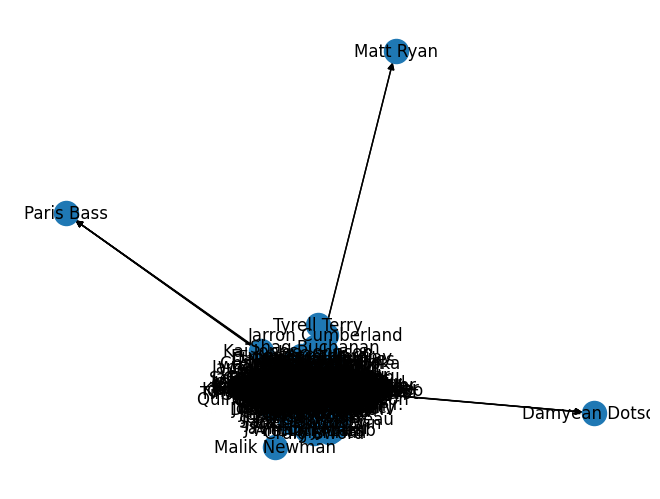

In [17]:
matchup_network = nx.from_pandas_edgelist(matchup_winners, 'Source', 'Target', ['Weighted Score'], create_using=nx.DiGraph())
nx.draw(matchup_network, with_labels=True)

In [21]:
from tqdm import tqdm
import time

# Grab all the rosters for the 2021-2022 season
rosters = pd.DataFrame()
teams = tqdm(players['TEAM_ID'].unique())
for team_id in teams:
    if team_id == 0:
        continue
    roster = commonteamroster.CommonTeamRoster(season='2021-22', team_id=team_id).get_data_frames()[0]
    rosters = rosters.append(roster)
    time.sleep(1)
    
rosters.head()

  0%|          | 0/31 [00:00<?, ?it/s]/var/folders/sj/62ytx1r538s1v9x1_0h3_2jc0000gp/T/ipykernel_50691/2042305094.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rosters = rosters.append(roster)
  3%|▎         | 1/31 [00:01<00:35,  1.19s/it]/var/folders/sj/62ytx1r538s1v9x1_0h3_2jc0000gp/T/ipykernel_50691/2042305094.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rosters = rosters.append(roster)
  6%|▋         | 2/31 [00:02<00:33,  1.16s/it]/var/folders/sj/62ytx1r538s1v9x1_0h3_2jc0000gp/T/ipykernel_50691/2042305094.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rosters = rosters.append(roster)
 10%|▉         | 3/31 [00:03<00:32,  1.16s/it]/var/folders/sj/62ytx1r538s1v9x1_0h3_2jc0000gp/T/ipykernel_50691/204230

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
0,1610612761,2021,00,Armoni Brooks,Armoni,armoni-brooks,1,G,6-3,195,"JUN 05, 1998",24.0,1,Houston,1629717,None
1,1610612761,2021,00,O.G. Anunoby,O.G.,og-anunoby,3,F,6-7,232,"JUL 17, 1997",24.0,4,Indiana,1628384,#23 Pick in 2017 Draft
2,1610612761,2021,00,Scottie Barnes,Scottie,scottie-barnes,4,F,6-7,225,"AUG 01, 2001",20.0,R,Florida State,1630567,#4 Pick in 2021 Draft
3,1610612761,2021,00,Precious Achiuwa,Precious,precious-achiuwa,5,F,6-8,225,"SEP 19, 1999",22.0,1,Memphis,1630173,Traded from MIA on 08/06/21
4,1610612761,2021,00,Justin Champagnie,Justin,justin-champagnie,11,G-F,6-6,206,"JUN 29, 2001",21.0,R,Pittsburgh,1630551,None


In [27]:
rosters[rosters['PLAYER'] == 'Jayson Tatum']['POSITION'].values[0].split('-')[0]

'F'

In [95]:
rosters.head()

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
0,1610612761,2021,00,Armoni Brooks,Armoni,armoni-brooks,1,G,6-3,195,"JUN 05, 1998",24.0,1,Houston,1629717,None
1,1610612761,2021,00,O.G. Anunoby,O.G.,og-anunoby,3,F,6-7,232,"JUL 17, 1997",24.0,4,Indiana,1628384,#23 Pick in 2017 Draft
2,1610612761,2021,00,Scottie Barnes,Scottie,scottie-barnes,4,F,6-7,225,"AUG 01, 2001",20.0,R,Florida State,1630567,#4 Pick in 2021 Draft
3,1610612761,2021,00,Precious Achiuwa,Precious,precious-achiuwa,5,F,6-8,225,"SEP 19, 1999",22.0,1,Memphis,1630173,Traded from MIA on 08/06/21
4,1610612761,2021,00,Justin Champagnie,Justin,justin-champagnie,11,G-F,6-6,206,"JUN 29, 2001",21.0,R,Pittsburgh,1630551,None


In [96]:
checkpoint('rosters_22.pkl', rosters)

In [29]:
# Set node attributes
nodes = tqdm(matchup_network.nodes())
for node in nodes:
    matchup_network.nodes[node]['name'] = node
    matchup_network.nodes[node]['team'] = players[players['DISPLAY_FIRST_LAST'] == node]['TEAM_ABBREVIATION'].values[0]
    position = rosters[rosters['PLAYER'] == node]['POSITION'].values
    if len(position) > 0:
        matchup_network.nodes[node]['position'] = position[0].split('-')[0]


100%|██████████| 600/600 [00:00<00:00, 1379.89it/s]


In [86]:
nx.write_gexf(matchup_network, 'matchup_network_weighted_score.gexf')

In [235]:
players

,PERSON_ID,DISPLAY_FIRST_LAST,PLAYER_SLUG,TEAM_ABBREVIATION
10,1630173,Precious Achiuwa,precious_achiuwa,TOR
22,203500,Steven Adams,steven_adams,MEM
24,1628389,Bam Adebayo,bam_adebayo,MIA
41,1630583,Santi Aldama,santi_aldama,MEM
44,200746,LaMarcus Aldridge,lamarcus_aldridge,BKN
...,...,...,...,...
4791,201152,Thaddeus Young,thaddeus_young,TOR
4793,1629027,Trae Young,trae_young,ATL
4794,1630209,Omer Yurtseven,omer_yurtseven,MIA
4797,203469,Cody Zeller,cody_zeller,


In [32]:
matchup_network.nodes['Trae Young']

{'name': 'Trae Young', 'team': 'ATL', 'position': 'G'}

In [262]:
matchup_network.edges['Jaxson Hayes', 'Kyle Kuzma']

{'Weight': 1.0}

In [34]:
checkpoint('matchups_winners_with_weighted_score.pkl', matchup_winners)

In [35]:
matchup_winners = load_checkpoint('matchups_winners_with_weighted_score.pkl')
matchup_winners.head()

,Source,Target,Score ratio,Matchup time (sec),Score Normalized,Matchup time normalized,Weighted Score
0,Clint Capela,Nikola Vucevic,0.007662,4040.4,0.003576,1.0,0.016037
1,Nikola Vucevic,Domantas Sabonis,0.010191,3776.8,0.004756,1.0,0.021330
2,Isaac Okoro,James Harden,0.010149,3621.9,0.004736,1.0,0.021241
3,Steven Adams,Nikola Jokic,0.027087,4127.1,0.012640,1.0,0.056693
4,Nikola Vucevic,Wendell Carter Jr.,0.004320,3651.5,0.002016,1.0,0.009042


In [66]:
matchup_network.nodes['Trae Young']

{'name': 'Trae Young', 'team': 'ATL', 'position': 'G'}

In [67]:
checkpoint('matchup_network_directed.pkl', matchup_network)

In [68]:
matchup_network = load_checkpoint('matchup_network_directed.pkl')
matchup_network.nodes['Jayson Tatum']

{'name': 'Jayson Tatum', 'team': 'BOS', 'position': 'F'}

In [246]:
for i in mn.neighbors('Jayson Tatum'):
    print(i)

De'Andre Hunter
Bogdan Bogdanovic
Russell Westbrook
O.G. Anunoby
Evan Fournier
Trae Young
Montrezl Harrell
Lance Stephenson
CJ McCollum
John Collins
Immanuel Quickley
Precious Achiuwa
Jalen Suggs
Karl-Anthony Towns
Kristaps Porzingis
Ricky Rubio
Ivica Zubac


In [574]:
def avg_neighbor_degree(G, node):
    return np.mean([G.degree(n) for n in G.neighbors(node)])

def friendship_paradox_test(G):
    return sum([G.degree(node) < avg_neighbor_degree(G, node) for node in G.nodes()]) / len(G)

friendship_paradox_test(mn)

/Users/abhishekdhar/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/abhishekdhar/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.7197696737044146

In [587]:
mn.degree('Isaac Okoro')

109

In [588]:
avg_neighbor_degree(mn, 'Isaac Okoro')

156.140625

## Predicting Playoff Winners for 2021-22 season

In [487]:
def predict_winner(matchup_network, team_1, team_2):
    team_1_players = []
    team_2_players = []

    for node in matchup_network.nodes():
        if node in ['James Harden', 'Kyrie Irving']:
            continue
        if matchup_network.nodes[node]['team'] == team_1:
            team_1_players.append(node)
        elif matchup_network.nodes[node]['team'] == team_2:
            team_2_players.append(node)

    team_1_score = 0
    team_2_score = 0

    for player_1 in team_1_players:
        for player_2 in team_2_players:
            if matchup_network.has_edge(player_2, player_1):
                team_1_score += matchup_network.edges[player_2, player_1]['Matchup time normalized']
            elif matchup_network.has_edge(player_1, player_2):
                team_2_score += matchup_network.edges[player_1, player_2]['Matchup time normalized']

    total_score = team_1_score + team_2_score
    
    if team_1_score > team_2_score:
        return team_1, round(team_1_score / total_score * 100, 2), team_2, round(team_2_score / total_score * 100, 2)
    elif team_2_score > team_1_score:
        return team_2, round(team_2_score / total_score * 100, 2), team_1, round(team_1_score / total_score * 100, 2)
    else:
        return "TIE", round(team_1_score / total_score * 100, 2), "TIE", round(team_2_score / total_score * 100, 2)

predict_winner(mn, 'GSW', 'BOS')

('BOS', 53.01, 'GSW', 46.99)

In [210]:
for node in matchup_network.nodes():
    print(node == 'Clint Capela')
    break

True


In [235]:
from nba_api.stats.endpoints import leaguegamefinder

# DEnver Nuggets team ID: 1610612743

# Find 2020-2021 season games of the Nets and the Bucks
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2021-22')
games = gamefinder.get_data_frames()[0]
games.head(100)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42021,1610612738,BOS,Boston Celtics,0042100406,2022-06-16,BOS vs. GSW,L,239,90,...,0.917,11,30,41,27,8,8,22,16,-13.0
1,42021,1610612744,GSW,Golden State Warriors,0042100406,2022-06-16,GSW @ BOS,W,241,103,...,1.000,15,29,44,27,13,7,15,20,13.0
2,42021,1610612744,GSW,Golden State Warriors,0042100405,2022-06-13,GSW vs. BOS,W,240,104,...,0.867,4,35,39,23,9,2,6,28,10.0
3,42021,1610612738,BOS,Boston Celtics,0042100405,2022-06-13,BOS @ GSW,L,238,94,...,0.677,8,39,47,18,2,2,18,16,-10.0
4,42021,1610612744,GSW,Golden State Warriors,0042100404,2022-06-10,GSW @ BOS,W,241,107,...,0.800,16,39,55,20,10,5,16,21,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,42021,1610612742,DAL,Dallas Mavericks,0042100176,2022-04-28,DAL @ UTA,W,240,98,...,0.818,3,34,37,22,6,4,9,19,2.0
96,42021,1610612743,DEN,Denver Nuggets,0042100165,2022-04-27,DEN @ GSW,L,240,98,...,0.690,14,36,50,26,5,5,14,21,-4.0
97,42021,1610612749,MIL,Milwaukee Bucks,0042100125,2022-04-27,MIL vs. CHI,W,240,116,...,0.800,7,44,51,23,10,2,16,13,16.0
98,42021,1610612744,GSW,Golden State Warriors,0042100165,2022-04-27,GSW vs. DEN,W,241,102,...,0.714,6,31,37,28,10,6,9,22,4.0


In [63]:
print(predict_winner(matchup_network, 'PHI', 'MIA'))

0.7877425651681332
0.7412162652277544
('PHI', 51.52, 'MIA', 48.48)


In [236]:
# Get boxscores for the game
from nba_api.stats.endpoints import boxscoretraditionalv2

boxscore = boxscoretraditionalv2.BoxScoreTraditionalV2(game_id='0042100125')
boxscore = boxscore.get_data_frames()[0]

teams = boxscore['TEAM_ABBREVIATION'].unique()

# Divide players with minutes into teams
print(teams)
team_1 = boxscore[(boxscore['TEAM_ABBREVIATION'] == teams[0]) & (boxscore['MIN'] is not None)]['PLAYER_NAME'].values
team_2 = boxscore[(boxscore['TEAM_ABBREVIATION'] == teams[1]) & (boxscore['MIN'] is not None)]['PLAYER_NAME'].values

predict_winner(matchup_network, team_1, team_2, teams[0], teams[1])

['CHI' 'MIL']


('MIL', 53.27, 'CHI', 46.73)

In [571]:
# Round of 16

bracket = [
# Eastern Conference Matchups
#     'ATL',
#     'MIA',
#     'TOR',
#     'PHI',
#     'CHI',
#     'MIL',
#     'BKN',
#     'BOS',
# # Western Conference Matchups
#     'PHX',
#     'NOP',
#     'UTA',
#     'DAL',
#     'DEN',
#     'GSW',
#     'MEM',
#     'MIN',

#     'UTA',
#     'MEM',
#     'LAC',
#     'DAL',
#     'DEN',
#     'POR',
#     'PHX',
#     'LAL',
# # Western Conference Matchups
#     'PHI',
#     'WAS',
#     'NYK',
#     'ATL',
#     'MIL',
#     'MIA',
#     'BOS',
#     'BKN',

    'PHI',
    'BKN',
    'MIL',
    'MIA',
    'BOS',
    'ATL',
    'NYK',
    'CLE',
    'DEN',
    'MIN',
    'LAC',
    'PHX',
    'LAL',
    'MEM',
    'SAC',
    'GSW'
]

while len(bracket) > 1:
    team_1, team_1_score, team_2, team_2_score = predict_winner(mn, bracket[0], bracket[1])
    print(f'{team_1} ({team_1_score}%) vs {team_2} ({team_2_score}%)')
    matchup_winner = team_1 if team_1_score > team_2_score else team_2
    bracket.append(matchup_winner)
    print("Matchup Winner: ", matchup_winner)
    bracket.pop(0)
    bracket.pop(0)

BKN (55.58%) vs PHI (44.42%)
Matchup Winner:  BKN
MIL (57.46%) vs MIA (42.54%)
Matchup Winner:  MIL
BOS (54.35%) vs ATL (45.65%)
Matchup Winner:  BOS
CLE (60.43%) vs NYK (39.57%)
Matchup Winner:  CLE
MIN (51.64%) vs DEN (48.36%)
Matchup Winner:  MIN
PHX (57.85%) vs LAC (42.15%)
Matchup Winner:  PHX
LAL (57.81%) vs MEM (42.19%)
Matchup Winner:  LAL
GSW (62.9%) vs SAC (37.1%)
Matchup Winner:  GSW
MIL (73.14%) vs BKN (26.86%)
Matchup Winner:  MIL
BOS (57.11%) vs CLE (42.89%)
Matchup Winner:  BOS
PHX (51.46%) vs MIN (48.54%)
Matchup Winner:  PHX
LAL (50.1%) vs GSW (49.9%)
Matchup Winner:  LAL
BOS (55.11%) vs MIL (44.89%)
Matchup Winner:  BOS
LAL (55.01%) vs PHX (44.99%)
Matchup Winner:  LAL
BOS (60.71%) vs LAL (39.29%)
Matchup Winner:  BOS


In [536]:
predict_winner(mn, 'GSW', 'BOS')

('BOS', 53.01, 'GSW', 46.99)

## Team Graph

In [142]:
teams = players['TEAM_ABBREVIATION'].unique()
teams = np.array(list(filter(lambda x: x != '', teams)))
teams

array(['TOR', 'MEM', 'MIA', 'BKN', 'UTA', 'MIL', 'CLE', 'NOP', 'LAL',
       'ORL', 'NYK', 'WAS', 'PHX', 'DET', 'CHA', 'CHI', 'SAC', 'DEN',
       'PHI', 'SAS', 'LAC', 'OKC', 'MIN', 'DAL', 'IND', 'GSW', 'POR',
       'ATL', 'BOS', 'HOU'], dtype='<U3')

In [143]:
len(list(matchup_network.neighbors('Jayson Tatum')))

71

In [550]:
from collections import defaultdict

team_edges = defaultdict(lambda: defaultdict(lambda: 0))

for node in mn.nodes():
    node_team = mn.nodes()[node]['team']
    if node_team == "":
        continue
    for neighbor in mn.neighbors(node):
        neighbor_team = mn.nodes()[neighbor]['team']
        if neighbor_team == "":
            continue
        if node_team != neighbor_team:
            team_edges[neighbor_team][node_team] += mn.edges[node, neighbor]['Matchup time normalized']


In [551]:
graph_edges = defaultdict(lambda: defaultdict(lambda: 0))

for team_1 in team_edges:
    for team_2 in team_edges[team_1]:
        team_1_score = team_edges[team_1][team_2]
        team_2_score = team_edges[team_2][team_1]
        total_score = team_1_score + team_2_score

        if team_1_score > team_2_score:
            graph_edges[team_1][team_2] = team_1_score / total_score
        elif team_2_score > team_1_score:
            graph_edges[team_2][team_1] = team_2_score / total_score
            



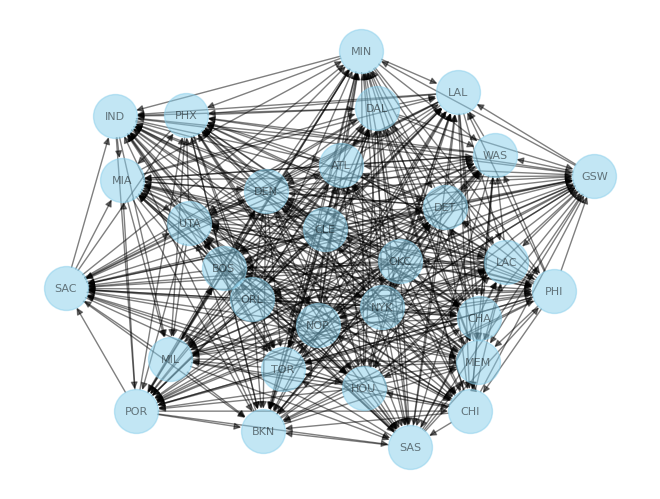

In [552]:
# Creating the graph
G = nx.DiGraph()

# Adding nodes
G.add_nodes_from(teams)

# Adding edges
for team_1 in graph_edges:
    for team_2 in graph_edges[team_1]:
        G.add_edge(team_2, team_1, weight=graph_edges[team_1][team_2])

nx.draw(G, with_labels=True, node_size=1000, node_color='skyblue', edge_color='black', width=1, alpha=0.5, font_size=8)

In [526]:
# Sort edges by weight
sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

[('SAC', 'MEM', {'weight': 0.8189257367870547}),
 ('MEM', 'WAS', {'weight': 0.7623881966210534}),
 ('MIL', 'DEN', {'weight': 0.7569843071349063}),
 ('GSW', 'MIL', {'weight': 0.7498571037074737}),
 ('TOR', 'NOP', {'weight': 0.7427222298629258}),
 ('OKC', 'SAS', {'weight': 0.7383071177687385}),
 ('ORL', 'NYK', {'weight': 0.7348132027566194}),
 ('BKN', 'GSW', {'weight': 0.718281601241863}),
 ('PHI', 'BOS', {'weight': 0.7122639366093555}),
 ('ATL', 'PHI', {'weight': 0.7088435869654287}),
 ('DAL', 'WAS', {'weight': 0.7084644049750761}),
 ('OKC', 'MIL', {'weight': 0.7028276630537024}),
 ('SAC', 'POR', {'weight': 0.7019759596303226}),
 ('OKC', 'HOU', {'weight': 0.7012769081517607}),
 ('DAL', 'CHA', {'weight': 0.6989207986090293}),
 ('NOP', 'PHI', {'weight': 0.6978482635957649}),
 ('ORL', 'BOS', {'weight': 0.6974537056909591}),
 ('MIN', 'PHI', {'weight': 0.697233635463634}),
 ('MEM', 'ATL', {'weight': 0.6965615000746058}),
 ('OKC', 'IND', {'weight': 0.6933250912653518}),
 ('OKC', 'ATL', {'weig

In [566]:
bracket = [
# Eastern Conference Matchups
#     'ATL',
#     'MIA',
#     'TOR',
#     'PHI',
#     'CHI',
#     'MIL',
#     'BKN',
#     'BOS',
# # Western Conference Matchups
#     'PHX',
#     'NOP',
#     'UTA',
#     'DAL',
#     'DEN',
#     'GSW',
#     'MEM',
#     'MIN',

#     'UTA',
#     'MEM',
#     'LAC',
#     'DAL',
#     'DEN',
#     'POR',
#     'PHX',
#     'LAL',
# # Western Conference Matchups
#     'PHI',
#     'WAS',
#     'NYK',
#     'ATL',
#     'MIL',
#     'MIA',
#     'BOS',
#     'BKN',

    # 'MIL',
    # 'ORL',
    # 'IND',
    # 'MIA',
    # 'PHI',
    # 'BOS',
    # 'TOR',
    # 'BKN',
    # 'LAL',
    # 'POR',
    # 'HOU',
    # 'OKC',
    # 'DEN',
    # 'UTA',
    # 'LAC',
    # 'DAL'

    'PHI',
    'BKN',
    'MIL',
    'MIA',
    'BOS',
    'ATL',
    'NYK',
    'CLE',
    'DEN',
    'MIN',
    'LAC',
    'PHX',
    'LAL',
    'MEM',
    'SAC',
    'GSW'
]

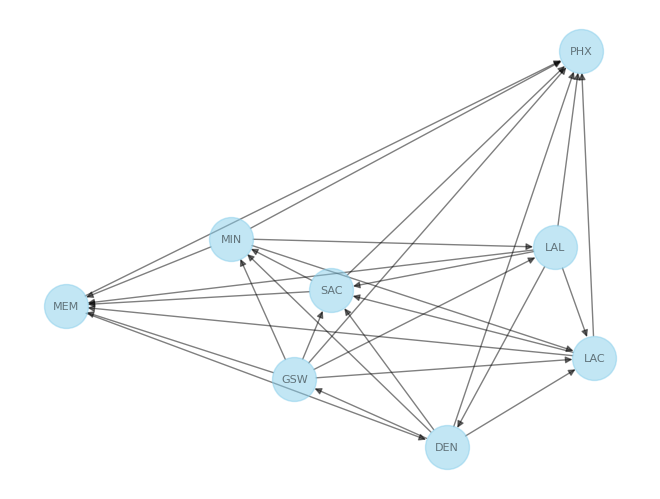

In [567]:
eastern_conference = bracket[8:]
western_conference = bracket[:8]

eastern_playoff = nx.subgraph(G, eastern_conference)
western_playoff = nx.subgraph(G, western_conference)

nx.draw(eastern_playoff, with_labels=True, node_size=1000, node_color='skyblue', edge_color='black', width=1, alpha=0.5, font_size=8)

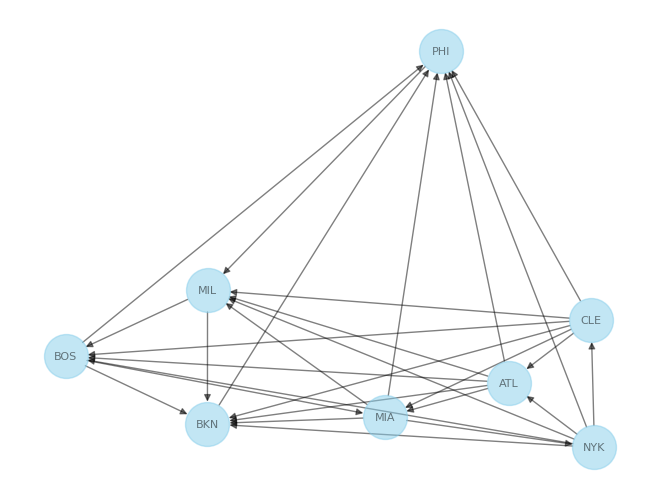

In [568]:
nx.draw(western_playoff, with_labels=True, node_size=1000, node_color='skyblue', edge_color='black', width=1, alpha=0.5, font_size=8)

In [556]:
# PageRank
pr = nx.pagerank(G, alpha=0.85)

# Sort the teams by PageRank
sorted_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)

# Print the teams and their PageRank
for team, score in sorted_pr:
    # if team in bracket:
    print(f'{team}: {score}')

    

IND: 0.047890134159906436
PHX: 0.046949203892566
BKN: 0.04528394257528906
MEM: 0.04330977686398341
MIA: 0.043263327336288945
GSW: 0.04266439193142607
WAS: 0.04157140350386419
LAL: 0.0399533760289454
POR: 0.03987845459804906
BOS: 0.03979330981321287
LAC: 0.039603233258601905
SAC: 0.03729342825676782
MIN: 0.03627419877520649
MIL: 0.036256392177703045
SAS: 0.035368048498803276
CHI: 0.03532198100615713
DET: 0.033353917145596046
DAL: 0.03259962278895366
DEN: 0.030860924295062864
UTA: 0.030220798953253483
HOU: 0.02980671858432719
PHI: 0.029780179530188765
TOR: 0.02931231234738709
ATL: 0.028933131612980466
NOP: 0.027571022910953955
CHA: 0.026828557921109577
NYK: 0.016580609853100167
ORL: 0.015658921938883203
CLE: 0.009036243788989776
OKC: 0.008782435652442667


In [569]:
# PageRank
pr = nx.pagerank(eastern_playoff, alpha=0.85)

# Sort the teams by PageRank
sorted_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)

# Print the teams and their PageRank
for team, score in sorted_pr:
    # if team in bracket:
    print(f'{team}: {score}')

    

PHX: 0.2536231780363252
MEM: 0.15519881816909303
SAC: 0.11623047162658483
DEN: 0.11383942913941941
LAC: 0.11301926008732248
MIN: 0.10572796527360878
LAL: 0.07790993998577268
GSW: 0.0644509376818732


In [570]:
pr = nx.pagerank(western_playoff, alpha=0.85)

# Sort the teams by PageRank
sorted_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)

# Print the teams and their PageRank
for team, score in sorted_pr:
    # if team in bracket:
    print(f'{team}: {score}')


MIL: 0.2583730655882491
PHI: 0.24902891742212468
BKN: 0.1976633136143443
BOS: 0.145181443156139
MIA: 0.06755103205276015
NYK: 0.03202662204028961
ATL: 0.026671854657244663
CLE: 0.02350375146884849


In [573]:
nx.write_gexf(western_playoff, "Graphs/eastern_23.gexf")

In [565]:
mn = load_checkpoint('matchup_network_2022-23.pkl')
predict_winner(mn, 'MEM', 'GSW')

('MEM', 67.02, 'GSW', 32.98)

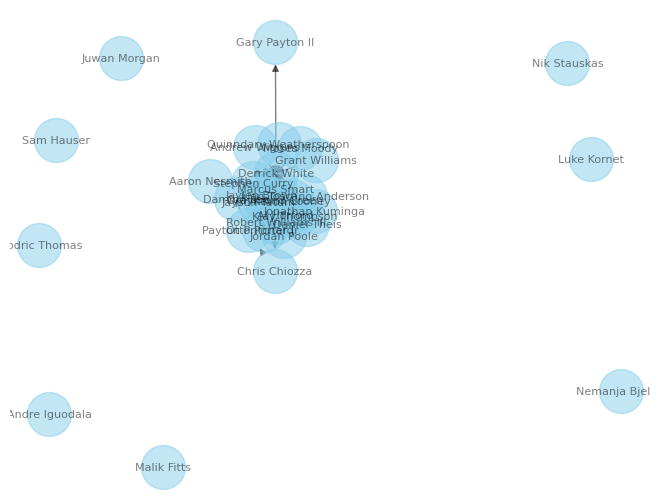

In [547]:
nodes = (
    node
    for node, data in mn.nodes(data=True)
    if data['team'] == 'BOS' or data['team'] == 'GSW'
)

subgraph = mn.subgraph(nodes)
nx.draw(subgraph, with_labels=True, node_size=1000, node_color='skyblue', edge_color='black', width=1, alpha=0.5, font_size=8)

In [548]:
nx.write_gexf(subgraph, "Graphs/gsw_bos.gexf")

Detecting Communities

In [372]:
comm = nx.community.louvain_communities(mn, weight='Matchup time normalized')
len(comm)

4

In [375]:
nx.community.modularity(mn, comm, weight='Matchup time normalized')

0.2823143722418443

In [384]:
# Get positions of each node in a community

comm_pos = defaultdict(lambda: defaultdict(lambda: 0))

for idx, c in enumerate(comm):
    print(idx, c)
    for node in c:
        try:
            pos = mn.nodes()[node]['position']
            comm_pos[idx][pos] += 1
        except:
            continue

comm_pos



0 {'Haywood Highsmith', 'Kenyon Martin Jr.', 'Gary Clark', 'Jabari Parker', 'Derrick Jones Jr.', 'Tony Snell', 'Torrey Craig', 'Nassir Little', 'Kevin Durant', 'Isaiah Todd', 'Cameron McGriff', 'Jeff Green', 'Chuma Okeke', 'Juan Toscano-Anderson', 'P.J. Tucker', 'Sekou Doumbouya', 'Justin Anderson', 'Jarred Vanderbilt', 'Greg Brown III', 'Jalen McDaniels', 'John Collins', 'Larry Nance Jr.', 'Semi Ojeleye', 'James Johnson', 'Vlatko Cancar', 'Wes Iwundu', 'Harrison Barnes', 'Julius Randle', 'Nik Stauskas', 'Marcus Morris Sr.', 'Javonte Green', 'Yuta Watanabe', 'Devontae Cacok', 'Admiral Schofield', 'Jerami Grant', 'Gabriel Deck', 'Danilo Gallinari', 'Tobias Harris', 'Maurice Harkless', 'Louis King', 'Kyle Kuzma', 'Jake Layman', 'Kevin Knox II', 'Miles Bridges', 'James Ennis III', 'Kessler Edwards', 'LeBron James', 'Ish Wainright', 'Bol Bol', 'Rudy Gay', 'Jared Harper', 'Justise Winslow', 'Keldon Johnson', 'Aleksej Pokusevski', 'Kevin Love', 'D.J. Wilson', 'Jae Crowder', 'Keita Bates-Diop

defaultdict(<function __main__.<lambda>()>,
            {0: defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'F': 80, 'G': 10, 'C': 1}),
             1: defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'F': 59, 'C': 60, 'G': 1}),
             2: defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'G': 104, 'F': 27}),
             3: defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'F': 18, 'G': 122})})